In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a CSV file with the data, replace 'your_csv_file.csv' with your actual CSV file name.
csv_filename = 'ScanCenH2_Proba_0.8_polymerasecount_0_F_10_newpolyproba_0.01.csv'
df = pd.read_csv(csv_filename)
df

,Time Steps,A in gene,CenHsize,Burst Frequency
0,1,4,15,0.1
1,201,3,15,0.1
2,401,6,15,0.1
3,601,5,15,0.1
4,801,6,15,0.1
...,...,...,...,...
319995,99001,1,30,1.0
319996,99201,2,30,1.0
319997,99401,2,30,1.0
319998,99601,1,30,1.0


In [ ]:
# Define the number of simulation steps and frames to show
simulation_steps = 100000
frames_to_show = simulation_steps // 200

# Extract and reshape 'A in gene' column
As = df['A in gene'].to_numpy()
As_reshaped = As.reshape(frames_to_show, len(As) // frames_to_show)
meanA, stdA = As_reshaped.mean(axis=1), As_reshaped.std(axis=1)
meanA.shape

(500,)

In [ ]:
meanA = meanA.repeat(len(As)//frames_to_show)
meanA.shape

array([5.7078125, 5.7078125, 5.7078125, ..., 0.6109375, 0.6109375,
       0.6109375])

In [ ]:
burst = np.linspace(0.1, 1, 40)
cenH = np.arange(15, 31)


In [ ]:
np.size(cenH)*np.size(burst)

600

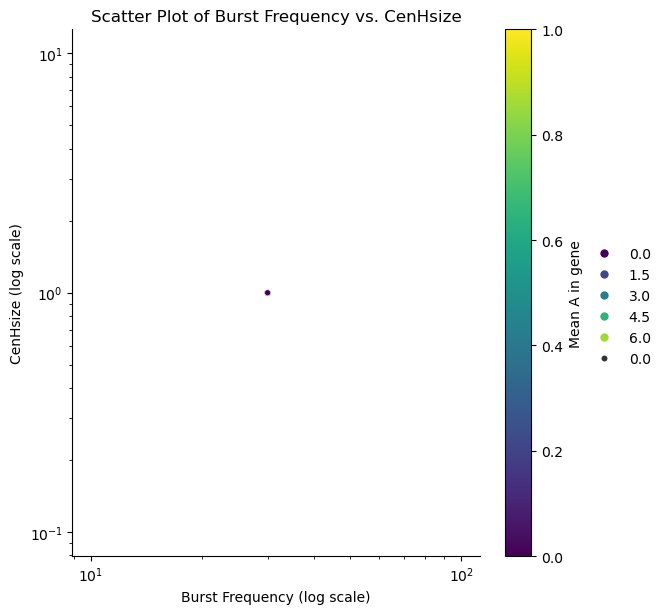

In [ ]:
# Create a scatter plot using seaborn
g = sns.relplot(data = df,
    x="CenHsize", y="Burst Frequency",
    hue=meanA, size=stdA,
    palette='viridis',
    height=6,
)

# Set log scale for both x and y axes
g.set(xscale="log", yscale="log")

# Add colorbar
cbar = plt.colorbar(g.ax.collections[0])
cbar.set_label('Mean A in gene')

# Set axis labels and title
plt.xlabel('Burst Frequency (log scale)')
plt.ylabel('CenHsize (log scale)')
plt.title('Scatter Plot of Burst Frequency vs. CenHsize')

# Show the plot
plt.show()
